<a href="https://colab.research.google.com/github/Asit-1121130118/practice-projects/blob/master/Cotton_disease_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Cotton Disease prediction using Transfer Learning VGG16***

In [1]:
# importing the libraries

import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob #used for knowing the number of input image folder 

In [2]:
# loading the data

IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/datasets/Cotton Disease/train'
test_path = '/content/drive/MyDrive/datasets/Cotton Disease/test'

In [3]:
# importing the vgg16 library
# using pre-defined imagenet weights and adding input layer

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# in input_shape, +[3] is for adding the third dimension to the image shape as it is for RGB channel

58892288/58889256 [==============================] - 1s 0us/step


In [4]:
# not training the input parameters

for layer in vgg16.layers:
  layer.trainable = False

In [6]:
# for checking the folder in input image

folders = glob('/content/drive/MyDrive/datasets/Cotton Disease/train/*')
folders

['/content/drive/MyDrive/datasets/Cotton Disease/train/diseased cotton leaf',
 '/content/drive/MyDrive/datasets/Cotton Disease/train/fresh cotton leaf']

In [7]:
# adding the output layer
x = Flatten()(vgg16.output)

In [8]:
# creating the model

pred = Dense(len(folders), activation='softmax')(x)
model = Model(inputs = vgg16.inputs, outputs = pred)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Use the Image Data Generator to preprocess the image and scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 715 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 51 images belonging to 2 classes.


In [15]:
# fitting the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
23/23 [==============================] - 676s 29s/step - loss: 0.5382 - accuracy: 0.7608 - val_loss: 0.1417 - val_accuracy: 0.9608
Epoch 2/20
23/23 [==============================] - 391s 17s/step - loss: 0.1374 - accuracy: 0.9510 - val_loss: 0.1576 - val_accuracy: 0.9216
Epoch 3/20
23/23 [==============================] - 393s 17s/step - loss: 0.0981 - accuracy: 0.9636 - val_loss: 0.0893 - val_accuracy: 0.9608
Epoch 4/20
23/23 [==============================] - 385s 17s/step - loss: 0.0669 - accuracy: 0.9832 - val_loss: 0.1484 - val_accuracy: 0.9412
Epoch 5/20
23/23 [==============================] - 389s 17s/step - loss: 0.0551 - accuracy: 0.9846 - val_loss: 0.1205 - val_accuracy: 0.9608
Epoch 6/20
23/23 [==============================] - 393s 17s/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.0670 - val_accuracy: 0.9804
Epoch 7/20
23/23 [==============================] - 390s 17s/step - loss: 0.0365 - accuracy: 0.9958 - val_loss: 0.0792 - val_accuracy: 0.9804
Epoch 

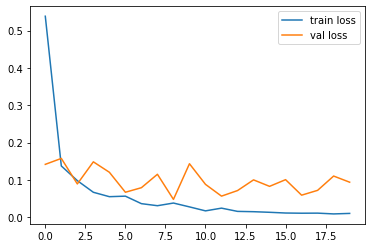

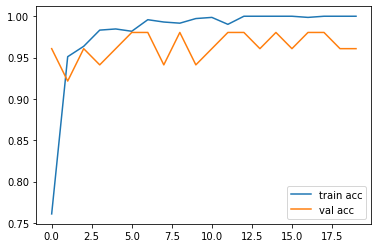

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_cotton_disease_vgg16.h5')

In [18]:
# Part 4 - Making a single prediction from test data
# image taken from test deseased cotton leaf

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/datasets/Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0.9878312 , 0.01216886]], dtype=float32)

In [19]:
# image taken from validation set deseased cotton leaf

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/datasets/Cotton Disease/val/diseased cotton leaf/dis_leaf (265)_iaip.jpg',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0.99795   , 0.00204998]], dtype=float32)

In [22]:
# image taken from val fresh cotton leaf

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/datasets/Cotton Disease/val/fresh cotton leaf/d (171)_iaip.jpg',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[2.2412001e-04, 9.9977595e-01]], dtype=float32)

In [27]:
y=np.argmax(model.predict(test_image), axis=1)
y

array([1])

In [28]:
if y==1:
  print("The image classified as fresh cotton leaf")
else:
  print("The image classified as deseased cotton leaf")

The image classified as fresh cotton leaf
